# Load Both Datasets

In [3]:
import pandas as pd

# Load data
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating_sampled.csv')

In [4]:
#Preview the first few rows
print("Anime dataset preview:")
display(anime.head())

Anime dataset preview:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:

print("\nRating dataset preview:")
display(rating.head())


Rating dataset preview:


,user_id,anime_id,rating
0,73424,7785,10
1,59789,19769,6
2,55960,59,10
3,71461,3342,10
4,55390,986,8


In [6]:

# Quick info
print("\nAnime info:")
print(anime.info())

print("\nRating info:")
print(rating.info())


Anime info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Rating info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   50000 non-null  int64
 1   anime_id  50000 non-null  int64
 2   rating    50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB
None


In [7]:
# Check for missing value or irregular values
# Check missing values
print("Missing values in anime:")
print(anime.isnull().sum())

print("\nMissing values in rating:")
print(rating.isnull().sum())

Missing values in anime:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in rating:
user_id     0
anime_id    0
rating      0
dtype: int64


In [8]:
# Check for duplicates
print("\nDuplicate rows in anime:", anime.duplicated().sum())
print("Duplicate rows in rating:", rating.duplicated().sum())


Duplicate rows in anime: 0
Duplicate rows in rating: 0


olumn	Missing Count	Meaning
genre	62	Some anime have no listed genres.
type	25	Missing format (TV, Movie, OVA, etc.).
rating	230	Average rating unavailable (maybe not rated yet).
Others (anime_id, name, episodes, members)	0	Clean.
Rating dataset	0 missing	Perfect.

In [9]:
# Copy anime dataset to avoid accidental overwrite
anime_clean = anime.copy()

# Fix missing 'genre'
# Replace NaN genres with 'Unknown'
anime_clean['genre'] = anime_clean['genre'].fillna('Unknown')

# Fix missing 'type'
# Replace NaN types with the most frequent (mode)
anime_clean['type'] = anime_clean['type'].fillna(anime_clean['type'].mode()[0])

# Fix missing 'rating'
# Replace missing ratings with the average rating of the same 'type'
anime_clean['rating'] = anime_clean.groupby('type')['rating'].transform(
    lambda x: x.fillna(x.mean())
)

# Verify
anime_clean.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [10]:
# Data Type Normalization 
anime_clean['episodes'] = pd.to_numeric(anime_clean['episodes'], errors='coerce')
anime_clean['rating'] = pd.to_numeric(anime_clean['rating'], errors='coerce')
anime_clean['members'] = pd.to_numeric(anime_clean['members'], errors='coerce')

In [11]:
# Clean Rating Dataset
rating_clean = rating[rating['rating'] != -1]
print("Filtered rating shape:", rating_clean.shape)

Filtered rating shape: (40558, 3)


In [12]:
merged = pd.merge(rating_clean, anime_clean, on='anime_id', how='inner')
print("Merged shape:", merged.shape)
merged.head()

Merged shape: (40558, 9)


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,73424,7785,10,Yojouhan Shinwa Taikei,"Mystery, Psychological, Romance",TV,11.0,8.65,122531
1,59789,19769,6,Mahou Sensou,"Action, Fantasy, Magic",TV,12.0,6.18,104192
2,55960,59,10,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26.0,7.57,266846
3,71461,3342,10,Mnemosyne: Mnemosyne no Musume-tachi,"Action, Horror, Sci-Fi, Shoujo Ai, Supernatural",TV,6.0,7.50,96092
4,55390,986,8,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Special,1.0,7.75,46276


In [13]:
# Check if the merged dataset is clean
print(merged.isnull().sum())
print(merged.dtypes)
print(merged.head())

user_id     0
anime_id    0
rating_x    0
name        0
genre       0
type        0
episodes    0
rating_y    0
members     0
dtype: int64
user_id       int64
anime_id      int64
rating_x      int64
name         object
genre        object
type         object
episodes    float64
rating_y    float64
members       int64
dtype: object
   user_id  anime_id  rating_x  \
0    73424      7785        10   
1    59789     19769         6   
2    55960        59        10   
3    71461      3342        10   
4    55390       986         8   

                                                name  \
0                             Yojouhan Shinwa Taikei   
1                                       Mahou Sensou   
2                                            Chobits   
3               Mnemosyne: Mnemosyne no Musume-tachi   
4  Dragon Ball Z Special 1: Tatta Hitori no Saish...   

                                             genre     type  episodes  \
0                  Mystery, Psychological, Romance  

In [14]:
# Data sanity check of numeric ranges
print("User ratings range:", merged['rating_x'].min(), "to", merged['rating_x'].max())
print("Average ratings range:", merged['rating_y'].min(), "to", merged['rating_y'].max())
print("Episodes min/max:", merged['episodes'].min(), merged['episodes'].max())

User ratings range: 1 to 10
Average ratings range: 2.0 to 9.37
Episodes min/max: 1.0 1787.0


In [15]:
merged = merged.rename(columns={
    'rating_x': 'user_rating',
    'rating_y': 'avg_rating'
})

In [16]:
merged.to_csv('anime_merged_clean.csv', index=False)
print("✅ Final clean dataset saved as anime_merged_clean.csv")

✅ Final clean dataset saved as anime_merged_clean.csv


Exploratory Data Analysis (EDA)

1. Distributions

2. Relationships

3. Visuals

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make visuals look clean
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

# --- Overview ---
print("Dataset Shape:", merged.shape)
print("\nColumn Summary:")
print(merged.dtypes)

# --- Quick Descriptive Statistics ---
merged.describe(include='all')

Dataset Shape: (40558, 9)

Column Summary:
user_id          int64
anime_id         int64
user_rating      int64
name            object
genre           object
type            object
episodes       float64
avg_rating     float64
members          int64
dtype: object


,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
count,40558.000000,40558.000000,40558.000000,40558,40558,40558,40558.000000,40558.000000,4.055800e+04
unique,NaN,NaN,NaN,4358,2044,6,NaN,NaN,NaN
top,NaN,NaN,NaN,Death Note,"Comedy, School, Slice of Life",TV,NaN,NaN,NaN
freq,NaN,NaN,NaN,209,312,27943,NaN,NaN,NaN
mean,36812.074338,8926.114034,7.818310,NaN,NaN,NaN,18.785468,7.673532,1.847873e+05
std,21014.470331,8903.399071,1.569585,NaN,NaN,NaN,36.762123,0.674213,1.908680e+05
min,5.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.700000e+01
25%,19011.000000,1225.250000,7.000000,NaN,NaN,NaN,3.000000,7.290000,4.633300e+04
50%,37051.500000,6287.000000,8.000000,NaN,NaN,NaN,12.000000,7.700000,1.170900e+05
75%,54851.000000,14005.000000,9.000000,NaN,NaN,NaN,24.000000,8.160000,2.563250e+05


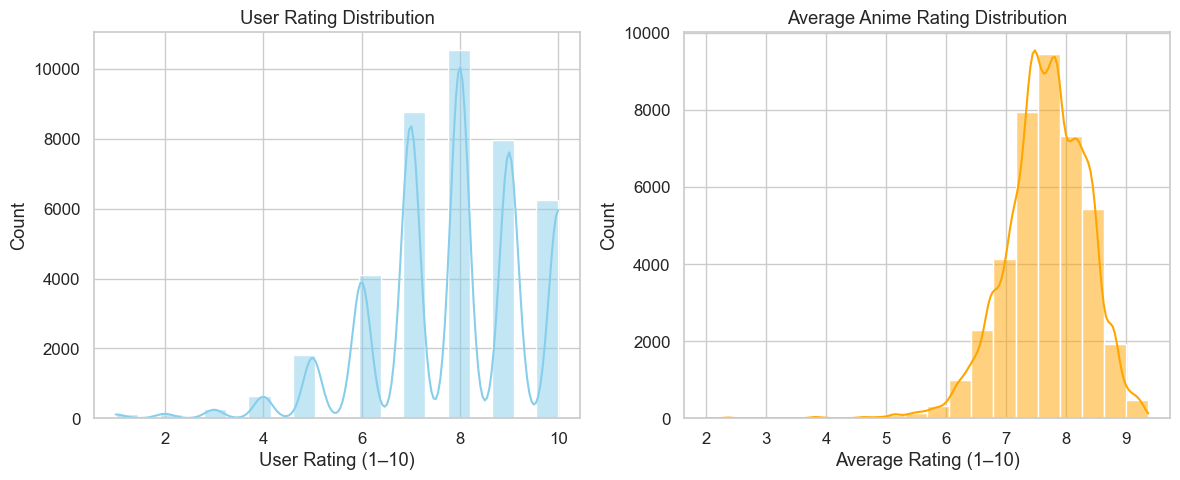

In [18]:
# Distirbution of rating
fig, axes = plt.subplots(1, 2, figsize =(12, 5))

sns.histplot(merged['user_rating'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('User Rating Distribution')
axes[0].set_xlabel('User Rating (1–10)')

sns.histplot(merged['avg_rating'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Average Anime Rating Distribution')
axes[1].set_xlabel('Average Rating (1–10)')

plt.tight_layout()
plt.show()

/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/1109359587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="pastel")


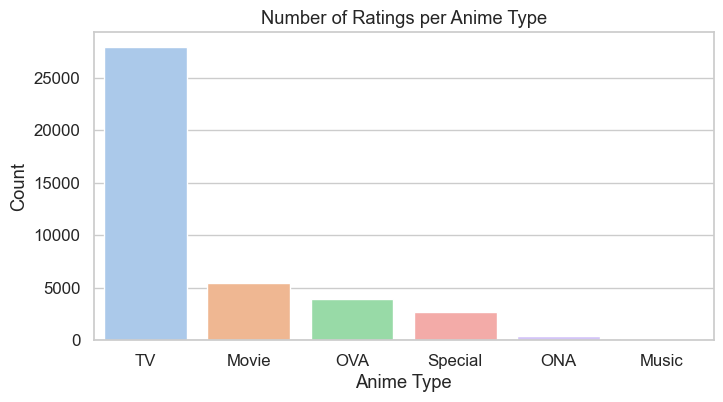

In [19]:
# Distribution by Anime Type
type_counts = merged['type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="pastel")
plt.title("Number of Ratings per Anime Type")
plt.xlabel("Anime Type")
plt.ylabel("Count")
plt.show()

/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/4065417782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='count', data=genre_df.head(10), palette='coolwarm')


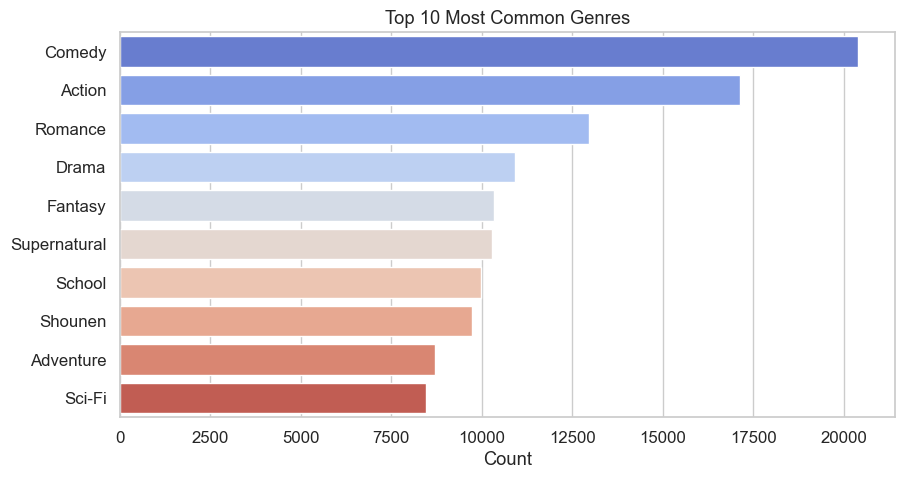

In [20]:
# Top 10 Genres by Average Rating
from collections import Counter

# Split genres and count frequency
genre_split = merged['genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
genre_counts = Counter([g for sublist in genre_split for g in sublist])

genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values('count', ascending=False)

# Plot top 10 genres
plt.figure(figsize=(10,5))
sns.barplot(y='genre', x='count', data=genre_df.head(10), palette='coolwarm')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/3811042244.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='user_rating', data=genre_rating.head(10), palette='crest')


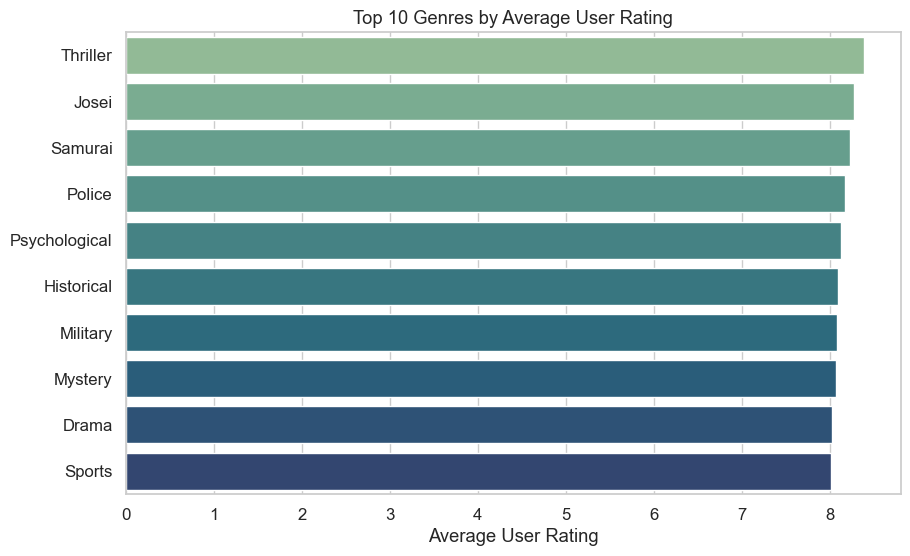

In [ ]:
#Which Genres Get the Highest Ratings?
genre_exploded = merged.assign(genre=merged['genre'].str.split(',')).explode('genre')
genre_exploded['genre'] = genre_exploded['genre'].str.strip()

# Calculate mean user rating by genre
genre_rating = (
    genre_exploded.groupby('genre')['user_rating']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(y='genre', x='user_rating', data=genre_rating.head(10), palette='crest')
plt.title('Top 10 Genres by Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('')
plt.show()


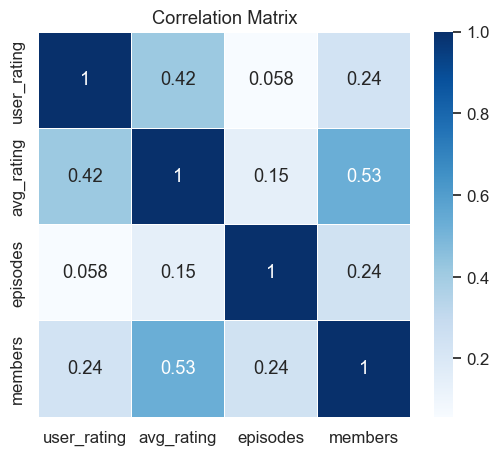

In [ ]:
# Correlation Between Popularity and Ratings
corr = merged[['user_rating', 'avg_rating', 'episodes', 'members']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/4071500386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popular.values, y=top_popular.index, palette='magma')


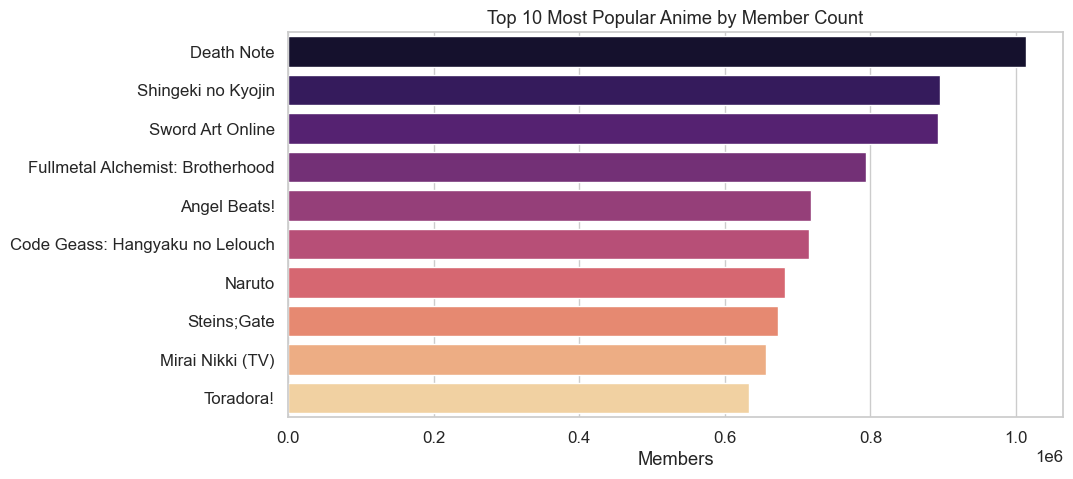

In [24]:
# Top 10 Most Popular Anime 
top_popular = merged.groupby('name')['members'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_popular.values, y=top_popular.index, palette='magma')
plt.title('Top 10 Most Popular Anime by Member Count')
plt.xlabel('Members')
plt.ylabel('')
plt.show()

/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/2037025498.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')


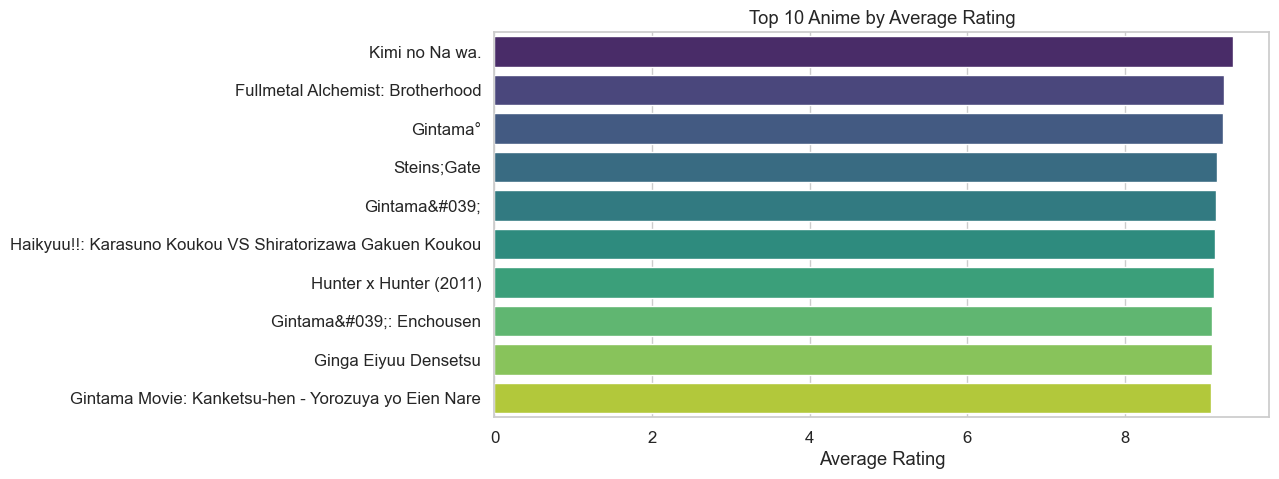

In [25]:
# Top 10 Highest Rated Anime
top_rated = (
    merged.groupby('name')['avg_rating']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.show()

# User Segentation 
The goal is to understand what type of users exist (e.g. users who love Romance vs Action vs Thriller)

In [35]:
# Create a pivot table that aggrgeates user rating by genre
# Expand genres into multiple rows
genre_expanded = merged.assign(genre=merged['genre'].str.split(',')).explode('genre')
genre_expanded['genre'] = genre_expanded['genre'].str.strip()

# Create pivot: users as rows, genres as columns
user_genre_matrix = genre_expanded.pivot_table(
    index='user_id',
    columns='genre',
    values='user_rating',
    aggfunc='mean'
).fillna(0)

user_genre_matrix.head()

genre,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
18,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,4.0,0.0,...,0.0,0.0,0.0,9.0,8.0,8.0,0.0,0.0,0.0,0.0


In [36]:
# Cluster users in order to use KMeans to find groups of similar users
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_genre_matrix)

# Fit clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
user_genre_matrix['cluster'] = kmeans.fit_predict(X_scaled)

user_genre_matrix['cluster'].value_counts()

cluster
1    8057
3    7872
0    3363
2    3274
Name: count, dtype: int64

In [37]:
cluster_summary = user_genre_matrix.groupby('cluster').mean().T
top_genres_by_cluster = cluster_summary.apply(lambda x: x.nlargest(5).index.tolist())
top_genres_by_cluster

cluster,0,1,2,3
0,Psychological,Action,Comedy,Comedy
1,Supernatural,Adventure,Romance,Romance
2,Action,Fantasy,Ecchi,School
3,Mystery,Comedy,Harem,Drama
4,Drama,Shounen,School,Slice of Life


Content Recommendation

Users in Cluster 0 might be recommended psychological action thrillers.

Users in Cluster 4 could be targeted with drama or slice-of-life recommendations.

Marketing Strategy

Cluster 1 users could respond best to emotional storytelling marketing (trailer highlighting relationships and fantasy worlds).

Cluster 2 might prefer fight scenes, world-building, or power-up arcs in promotions.

Product Personalization

If this were a real product dashboard, these clusters could help design:

Homepage banners that match viewing tastes.

“Because you watched...” sections aligned by cluster.

Tailored email recommendations (e.g., “New fantasy romance anime you’ll love”).

Cluster	Label	Taste Profile

0	Complex Thinkers	Action, Psychology, Comedy

1	Emotional Adventurers	Fantasy, Romance

2	Shōnen Core Fans	Action, Fantasy, Ecchi

3	Social Slice Enthusiasts	Mystery, Harem, Drama

4	Everyday Story Lovers	

In [40]:
# A/B Testing Simulation (Subbed vs Dubbed Engagement)

import numpy as np
np.random.seed(42)

n_users = 5000
group = np.random.choice(['Subbed', 'Dubbed'], size=n_users)
completion_rate = np.where(group == 'Subbed',
                           np.random.normal(0.65, 0.08, n_users),
                           np.random.normal(0.68, 0.08, n_users))

ab_test = pd.DataFrame({'group': group, 'completion_rate': completion_rate})
ab_test.head()

,group,completion_rate
0,Subbed,0.691690
1,Dubbed,0.652628
2,Subbed,0.694448
3,Subbed,0.657166
4,Subbed,0.634213


In [ ]:
# Perform Hypothesis Test
# Compare average completion rate between subbed vs dubbed
#If p_value < 0.05 → statistically significant difference
from scipy import stats

subbed = ab_test[ab_test['group'] == 'Subbed']['completion_rate']
dubbed = ab_test[ab_test['group'] == 'Dubbed']['completion_rate']

t_stat, p_value = stats.ttest_ind(subbed, dubbed)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

T-statistic: -14.198, P-value: 0.0000


/var/folders/rr/wcdh90gd5xvgdhgf2v2r63_c0000gn/T/ipykernel_29615/2121161854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='completion_rate', data=ab_test, palette='pastel')


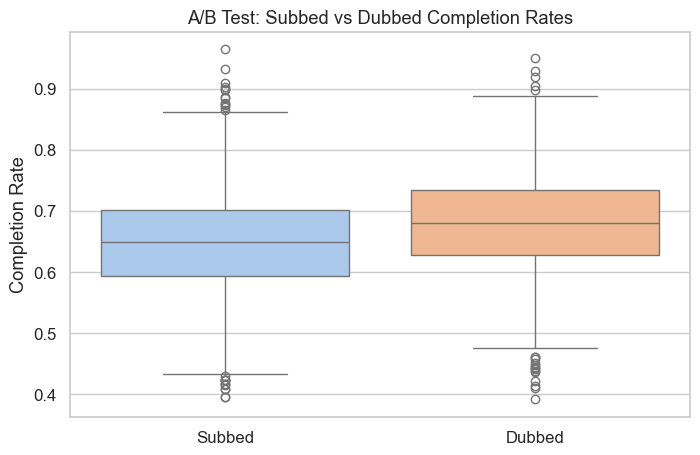

In [43]:
sns.boxplot(x='group', y='completion_rate', data=ab_test, palette='pastel')
plt.title('A/B Test: Subbed vs Dubbed Completion Rates')
plt.xlabel('')
plt.ylabel('Completion Rate')
plt.show()

An A/B test simulating user engagement between Subbed and Dubbed anime revealed a statistically significant difference in completion rates (t = -14.2, p < 0.001). Viewers watching Dubbed versions exhibited higher completion rates on average, suggesting that localized audio may improve content retention and user satisfaction.

Recommendation: Increasing dubbing options for popular shows, or promotoe "dual-language" experiences. Track if adding dubbed versions raises completion rates for subtitled heavy content

In [44]:
# Recommendation System

# 1 Step: Create a USer-Anime Matric
user_anime_matrix = merged.pivot_table(
    index='user_id',
    columns='name',
    values='user_rating'
).fillna(0)

In [45]:
# Collaborative Fillng
# We’ll use cosine similarity between anime to recommend similar titles.

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute similarity between anime titles
similarity_matrix = cosine_similarity(user_anime_matrix.T)

# Convert to DataFrame for easy lookup
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=user_anime_matrix.columns, 
                             columns=user_anime_matrix.columns)

In [48]:
def recommend_anime(title, n=5):
    if title not in similarity_df.columns:
        return "Anime not found in dataset."
    similar_scores = similarity_df[title].sort_values(ascending=False)[1:n+1]
    return similar_scores

# Example:
recommend_anime("Death Note")

name
Little Busters!: EX                                0.077225
Dokkiri Doctor                                     0.077225
Sora no Method: Aru Shoujo no Kyuujitsu★           0.077225
Detective Conan Movie 20: The Darkest Nightmare    0.077225
Akina to Onsen de H Shiyo!                         0.077225
Name: Death Note, dtype: float64